In [1]:
import nltk
import datetime as DT # need package for seperation of date and time
import time
from textblob import TextBlob
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn import datasets
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from nltk.stem.snowball import SnowballStemmer
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

%matplotlib inline

C:\Users\mcade\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv('Crimes_-_2001_to_present.csv')
data.shape

(6264803, 22)

In [3]:
data = data.sample(frac=.01)
data.head(3).T

,3259177,2868452,2650944
ID,10583362,4039003,3678014
Case Number,HZ332670,HL318377,HK756405
Date,07/02/2016 12:28:00 PM,04/26/2005 06:15:00 AM,11/17/2004 01:31:00 PM
Block,071XX S VINCENNES AVE,041XX W MONROE ST,028XX N CLYBOURN AVE
IUCR,1330,2024,2017
Primary Type,CRIMINAL TRESPASS,NARCOTICS,NARCOTICS
Description,TO LAND,POSS: HEROIN(WHITE),MANU/DELIVER:CRACK
Location Description,PARKING LOT/GARAGE(NON.RESID.),SIDEWALK,STREET
Arrest,True,True,True
Domestic,False,False,False


In [4]:
#data['Date'] = pd.to_datetime(data.Date)

In [5]:
'''Here I am removing time in hours from my date col'''
temp = pd.DatetimeIndex(data['Date'])
data['Date'] = temp.date
# data['Time'] = temp.time


In [6]:
data.head(3).T

,3259177,2868452,2650944
ID,10583362,4039003,3678014
Case Number,HZ332670,HL318377,HK756405
Date,2016-07-02,2005-04-26,2004-11-17
Block,071XX S VINCENNES AVE,041XX W MONROE ST,028XX N CLYBOURN AVE
IUCR,1330,2024,2017
Primary Type,CRIMINAL TRESPASS,NARCOTICS,NARCOTICS
Description,TO LAND,POSS: HEROIN(WHITE),MANU/DELIVER:CRACK
Location Description,PARKING LOT/GARAGE(NON.RESID.),SIDEWALK,STREET
Arrest,True,True,True
Domestic,False,False,False


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62648 entries, 3259177 to 5216018
Data columns (total 22 columns):
ID                      62648 non-null int64
Case Number             62648 non-null object
Date                    62648 non-null object
Block                   62648 non-null object
IUCR                    62648 non-null object
Primary Type            62648 non-null object
Description             62648 non-null object
Location Description    62620 non-null object
Arrest                  62648 non-null bool
Domestic                62648 non-null bool
Beat                    62648 non-null int64
District                62647 non-null float64
Ward                    56585 non-null float64
Community Area          56575 non-null float64
FBI Code                62648 non-null object
X Coordinate            61702 non-null float64
Y Coordinate            61702 non-null float64
Year                    62648 non-null int64
Updated On              62648 non-null object
Latitude   

In [8]:
# data.head(3)

In [9]:
# establish baseline FIRST
# drop highly correlated variables? no nessecary all of the time [IF THERE IS NOT ALOT OF CORRELATION]
# gradiant boosting can picks up on the smallest of relationships
# reduce variable space with PCA (if variables are so small, no need) 
# The reason why we want to cast out the highly correlated variables is to attempt to reduce 'overfitting' or blanketed, highly general answers
# after finding a correlation, gridsearch and score all of the data with it and cross validate it 5 times or cv=5
# you must become more specific around the parameters
# http://www.city-data.com/neighborhood/Wicker-Park-Chicago-IL.html

In [10]:
data.columns.tolist()

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [11]:
data.Latitude.unique()

array([ 41.76456915,  41.87971732,  41.93279193, ...,  41.92442179,
        41.86185968,  41.8061514 ])

In [12]:
data.Description.value_counts()

SIMPLE                                        7483
$500 AND UNDER                                5015
DOMESTIC BATTERY SIMPLE                       4703
TO VEHICLE                                    3534
TO PROPERTY                                   3355
OVER $500                                     3194
POSS: CANNABIS 30GMS OR LESS                  2762
FORCIBLE ENTRY                                2487
AUTOMOBILE                                    2296
FROM BUILDING                                 2077
RETAIL THEFT                                  1568
TELEPHONE THREAT                              1251
POSS: CRACK                                   1157
TO LAND                                       1085
HARASSMENT BY TELEPHONE                        922
AGGRAVATED: OTHER DANG WEAPON                  909
UNLAWFUL ENTRY                                 886
POSS: HEROIN(WHITE)                            856
ARMED: HANDGUN                                 833
STRONGARM - NO WEAPON          

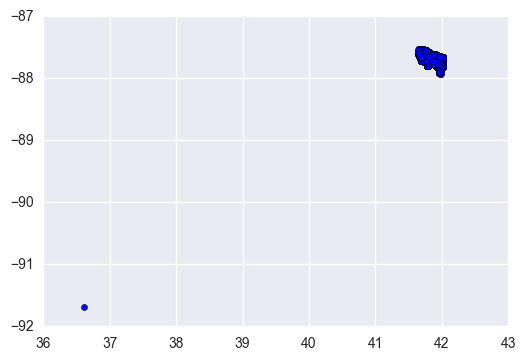

In [13]:
plt.scatter(data['Latitude'], data['Longitude'])
plt.show()

In [14]:
'''Testing Masks'''
# mask_1 = (data['Description']== 'SIMPLE')
# mask_2 = (data['Description']== 'DOMESTIC BATTERY SIMPLE')
# mask_3 = (data['Description']== 'POSS: CANNABIS 30GMS OR LESS')
# mask_4 = ((data['Description'] == 'AGGRAVATED: HANDGUN') | (data['Description'] == 'AGGRAVATED:KNIFE/CUTTING INSTR'))

'''Final Mask to create data_vf'''
mask_fv = ((data['Description']== 'SIMPLE') | (data['Description']== 'DOMESTIC BATTERY SIMPLE'))

In [15]:
data_simple_v4 = data[mask_fv]

In [17]:
#data_simple = data[mask_1]
#data_simple_v2 = data[mask_2]
#data_simple_v3 = data[mask_3]

In [18]:
'''Keeping simple acts of crime.....'''
print data_simple_v4.shape
data_simple_v4.head(3).T

#data_simple_v2.Description.value_counts()
#data_simple_v3.head(5)

(12186, 22)


,5855347,3579087,5683638
ID,8433360,4887366,8165533
Case Number,HV111720,HM501899,HT400248
Date,2012-01-09,2006-07-26,2011-07-16
Block,077XX S MARSHFIELD AVE,032XX E 92ND ST,016XX W JONQUIL TER
IUCR,0486,0460,0460
Primary Type,BATTERY,BATTERY,BATTERY
Description,DOMESTIC BATTERY SIMPLE,SIMPLE,SIMPLE
Location Description,APARTMENT,RESIDENCE PORCH/HALLWAY,SIDEWALK
Arrest,False,False,False
Domestic,True,False,False


In [19]:
data_simple_v4['Description'].value_counts()

SIMPLE                     7483
DOMESTIC BATTERY SIMPLE    4703
Name: Description, dtype: int64

In [20]:
data_simple_v4['Primary Type'].value_counts()

BATTERY     9451
ASSAULT     2705
STALKING      30
Name: Primary Type, dtype: int64

In [21]:
def binary_simple(x):
    if x == 'BATTERY':
        return 1
    else:
        return 0

In [22]:
data_simple_v4['y_predict'] = data_simple_v4['Primary Type'].map(binary_simple)

C:\Users\mcade\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [23]:
data_simple_v4.y_predict.value_counts()

1    9451
0    2735
Name: y_predict, dtype: int64

In [24]:
data_simple_v4['Primary Type'].value_counts()

BATTERY     9451
ASSAULT     2705
STALKING      30
Name: Primary Type, dtype: int64

In [25]:
'''Checking at Domestic Violence'''
data_simple_v4.head(3).T

,5855347,3579087,5683638
ID,8433360,4887366,8165533
Case Number,HV111720,HM501899,HT400248
Date,2012-01-09,2006-07-26,2011-07-16
Block,077XX S MARSHFIELD AVE,032XX E 92ND ST,016XX W JONQUIL TER
IUCR,0486,0460,0460
Primary Type,BATTERY,BATTERY,BATTERY
Description,DOMESTIC BATTERY SIMPLE,SIMPLE,SIMPLE
Location Description,APARTMENT,RESIDENCE PORCH/HALLWAY,SIDEWALK
Arrest,False,False,False
Domestic,True,False,False


In [26]:
data_simple_v4.Description.value_counts()

SIMPLE                     7483
DOMESTIC BATTERY SIMPLE    4703
Name: Description, dtype: int64

In [27]:
# arrest_bat = 'Arrest'
data_simple_v4['Arrest_Bat'] = 0
data_simple_v4.loc[data.Arrest, 'Arrest_Bat'] = 1
data_simple_v4.head(5)

C:\Users\mcade\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\mcade\AppData\Local\Continuum\Anaconda2\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,y_predict,Arrest_Bat
5855347,8433360,HV111720,2012-01-09,077XX S MARSHFIELD AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,08B,1166685.0,1853463.0,2012,02/04/2016 06:33:39 AM,41.753466,-87.664731,"(41.753466436, -87.664730628)",1,0
3579087,4887366,HM501899,2006-07-26,032XX E 92ND ST,0460,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,...,08B,1199414.0,1844576.0,2006,04/15/2016 08:55:02 AM,41.728319,-87.545091,"(41.728319311, -87.545091126)",1,0
5683638,8165533,HT400248,2011-07-16,016XX W JONQUIL TER,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,08B,1163865.0,1951001.0,2011,02/04/2016 06:33:39 AM,42.021178,-87.672311,"(42.021178195, -87.672311469)",1,0
4916438,6971580,HR375925,2009-06-15,055XX W MONROE ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,08B,1139673.0,1899117.0,2009,02/04/2016 06:33:39 AM,41.879282,-87.762610,"(41.879281726, -87.762610066)",1,0
2302368,3225382,HK244091,2004-03-16,015XX W ROOSEVELT RD,0560,ASSAULT,SIMPLE,GAS STATION,True,False,...,08A,1166240.0,1894783.0,2004,04/15/2016 08:55:02 AM,41.866863,-87.665184,"(41.866862652, -87.665184141)",0,1


In [28]:
'''Creating my Final Data Frame'''
data_fv = data_simple_v4[mask_fv]

C:\Users\mcade\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [29]:
data_fv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12186 entries, 5855347 to 2270850
Data columns (total 24 columns):
ID                      12186 non-null int64
Case Number             12186 non-null object
Date                    12186 non-null object
Block                   12186 non-null object
IUCR                    12186 non-null object
Primary Type            12186 non-null object
Description             12186 non-null object
Location Description    12186 non-null object
Arrest                  12186 non-null bool
Domestic                12186 non-null bool
Beat                    12186 non-null int64
District                12185 non-null float64
Ward                    10888 non-null float64
Community Area          10886 non-null float64
FBI Code                12186 non-null object
X Coordinate            12061 non-null float64
Y Coordinate            12061 non-null float64
Year                    12186 non-null int64
Updated On              12186 non-null object
Latitude   

In [30]:
data_fv.head(3).T

,5855347,3579087,5683638
ID,8433360,4887366,8165533
Case Number,HV111720,HM501899,HT400248
Date,2012-01-09,2006-07-26,2011-07-16
Block,077XX S MARSHFIELD AVE,032XX E 92ND ST,016XX W JONQUIL TER
IUCR,0486,0460,0460
Primary Type,BATTERY,BATTERY,BATTERY
Description,DOMESTIC BATTERY SIMPLE,SIMPLE,SIMPLE
Location Description,APARTMENT,RESIDENCE PORCH/HALLWAY,SIDEWALK
Arrest,False,False,False
Domestic,True,False,False


In [31]:
data_fv.isnull().sum()

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description       0
Arrest                     0
Domestic                   0
Beat                       0
District                   1
Ward                    1298
Community Area          1300
FBI Code                   0
X Coordinate             125
Y Coordinate             125
Year                       0
Updated On                 0
Latitude                 125
Longitude                125
Location                 125
y_predict                  0
Arrest_Bat                 0
dtype: int64

In [32]:
data_fv.head(3).T

,5855347,3579087,5683638
ID,8433360,4887366,8165533
Case Number,HV111720,HM501899,HT400248
Date,2012-01-09,2006-07-26,2011-07-16
Block,077XX S MARSHFIELD AVE,032XX E 92ND ST,016XX W JONQUIL TER
IUCR,0486,0460,0460
Primary Type,BATTERY,BATTERY,BATTERY
Description,DOMESTIC BATTERY SIMPLE,SIMPLE,SIMPLE
Location Description,APARTMENT,RESIDENCE PORCH/HALLWAY,SIDEWALK
Arrest,False,False,False
Domestic,True,False,False


In [33]:
# data_fv['Date'].dropna()
data_fv['Date'] = pd.to_datetime(data_fv["Date"])



# df['date'] = pd.to_datetime(df['date'], format='%m%d%Y')

#data_fv1 = data_fv.set_index('Date')

In [34]:
'''El problema'''
temp = pd.DatetimeIndex(data_fv['Date'])
data_fv['Clean_Date'] = temp.date
# data['Time'] = temp.time

In [35]:
data_fv.head(4).T

,5855347,3579087,5683638,4916438
ID,8433360,4887366,8165533,6971580
Case Number,HV111720,HM501899,HT400248,HR375925
Date,2012-01-09 00:00:00,2006-07-26 00:00:00,2011-07-16 00:00:00,2009-06-15 00:00:00
Block,077XX S MARSHFIELD AVE,032XX E 92ND ST,016XX W JONQUIL TER,055XX W MONROE ST
IUCR,0486,0460,0460,0460
Primary Type,BATTERY,BATTERY,BATTERY,BATTERY
Description,DOMESTIC BATTERY SIMPLE,SIMPLE,SIMPLE,SIMPLE
Location Description,APARTMENT,RESIDENCE PORCH/HALLWAY,SIDEWALK,SIDEWALK
Arrest,False,False,False,False
Domestic,True,False,False,False


In [36]:
data_fv.Clean_Date.describe()

count          12186
unique          4980
top       2002-06-12
freq              11
Name: Clean_Date, dtype: object

In [37]:
'''I have cleaned the Date and will turn into the index'''

data_fv.set_index('Clean_Date', inplace=True)

In [38]:
data_fv.head(3)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,y_predict,Arrest_Bat
Clean_Date,,,,,,,,,,,,,,,,,,,,,
2012-01-09,8433360,HV111720,2012-01-09,077XX S MARSHFIELD AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,08B,1166685.0,1853463.0,2012,02/04/2016 06:33:39 AM,41.753466,-87.664731,"(41.753466436, -87.664730628)",1,0
2006-07-26,4887366,HM501899,2006-07-26,032XX E 92ND ST,0460,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,...,08B,1199414.0,1844576.0,2006,04/15/2016 08:55:02 AM,41.728319,-87.545091,"(41.728319311, -87.545091126)",1,0
2011-07-16,8165533,HT400248,2011-07-16,016XX W JONQUIL TER,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,08B,1163865.0,1951001.0,2011,02/04/2016 06:33:39 AM,42.021178,-87.672311,"(42.021178195, -87.672311469)",1,0


In [39]:
#data_fv.info()

In [40]:
data_fv.head(3).T

Clean_Date,2012-01-09,2006-07-26,2011-07-16
ID,8433360,4887366,8165533
Case Number,HV111720,HM501899,HT400248
Date,2012-01-09 00:00:00,2006-07-26 00:00:00,2011-07-16 00:00:00
Block,077XX S MARSHFIELD AVE,032XX E 92ND ST,016XX W JONQUIL TER
IUCR,0486,0460,0460
Primary Type,BATTERY,BATTERY,BATTERY
Description,DOMESTIC BATTERY SIMPLE,SIMPLE,SIMPLE
Location Description,APARTMENT,RESIDENCE PORCH/HALLWAY,SIDEWALK
Arrest,False,False,False
Domestic,True,False,False


In [41]:
data_fv.head(2)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,y_predict,Arrest_Bat
Clean_Date,,,,,,,,,,,,,,,,,,,,,
2012-01-09,8433360,HV111720,2012-01-09,077XX S MARSHFIELD AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,08B,1166685.0,1853463.0,2012,02/04/2016 06:33:39 AM,41.753466,-87.664731,"(41.753466436, -87.664730628)",1,0
2006-07-26,4887366,HM501899,2006-07-26,032XX E 92ND ST,0460,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,...,08B,1199414.0,1844576.0,2006,04/15/2016 08:55:02 AM,41.728319,-87.545091,"(41.728319311, -87.545091126)",1,0


In [42]:
target_col = data_fv['Arrest_Bat'].values
target_col

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [43]:
col_list  = data_fv.columns.tolist()
no_need = ['Arrest','Date', 'Case Number', 
            'Arrest_Bat', 'Updated On', 'Latitude', 'Beat', 'Year',
            'Longitude', 'Location', 'FBI Code', 'Description', 'Block',
            'X Coordinate', 'Y Coordinate', 'Ward','Community Area', 'ID']

'''Defining target Var'''
target_col = data_fv['Arrest_Bat'].values

feature_cols = data_fv[[i for i in col_list if i not in no_need]]

print target_col.shape, feature_cols.shape

(12186L,) (12186, 6)


In [44]:
feature_cols.head(3)

,IUCR,Primary Type,Location Description,Domestic,District,y_predict
Clean_Date,,,,,,
2012-01-09,0486,BATTERY,APARTMENT,True,6.0,1
2006-07-26,0460,BATTERY,RESIDENCE PORCH/HALLWAY,False,4.0,1
2011-07-16,0460,BATTERY,SIDEWALK,False,24.0,1


In [45]:
feature_cols = pd.get_dummies(feature_cols)
feature_cols.head(3).T

Clean_Date,2012-01-09,2006-07-26,2011-07-16
Domestic,True,False,False
District,6,4,24
y_predict,1,1,1
IUCR_0460,0,1,1
IUCR_0486,1,0,0
IUCR_0560,0,0,0
IUCR_0580,0,0,0
Primary Type_ASSAULT,0,0,0
Primary Type_BATTERY,1,1,1
Primary Type_STALKING,0,0,0


In [46]:
# {'False':0,
#  'True' :1}
def binary_simple(x):
    if x == True:
        return 1
    else:
        return 0

In [47]:
feature_cols['Domestic'] = feature_cols['Domestic'].apply(binary_simple)

In [48]:
feature_cols.head(3).T

Clean_Date,2012-01-09,2006-07-26,2011-07-16
Domestic,1.0,0.0,0.0
District,6.0,4.0,24.0
y_predict,1.0,1.0,1.0
IUCR_0460,0.0,1.0,1.0
IUCR_0486,1.0,0.0,0.0
IUCR_0560,0.0,0.0,0.0
IUCR_0580,0.0,0.0,0.0
Primary Type_ASSAULT,0.0,0.0,0.0
Primary Type_BATTERY,1.0,1.0,1.0
Primary Type_STALKING,0.0,0.0,0.0


In [49]:
feature_cols.Domestic.value_counts()

0    7122
1    5064
Name: Domestic, dtype: int64

In [50]:
#X_all['Arrest'][10]

In [51]:
data_fv.head(3).T

Clean_Date,2012-01-09,2006-07-26,2011-07-16
ID,8433360,4887366,8165533
Case Number,HV111720,HM501899,HT400248
Date,2012-01-09 00:00:00,2006-07-26 00:00:00,2011-07-16 00:00:00
Block,077XX S MARSHFIELD AVE,032XX E 92ND ST,016XX W JONQUIL TER
IUCR,0486,0460,0460
Primary Type,BATTERY,BATTERY,BATTERY
Description,DOMESTIC BATTERY SIMPLE,SIMPLE,SIMPLE
Location Description,APARTMENT,RESIDENCE PORCH/HALLWAY,SIDEWALK
Arrest,False,False,False
Domestic,True,False,False


In [52]:
data_fv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12186 entries, 2012-01-09 to 2004-02-18
Data columns (total 24 columns):
ID                      12186 non-null int64
Case Number             12186 non-null object
Date                    12186 non-null datetime64[ns]
Block                   12186 non-null object
IUCR                    12186 non-null object
Primary Type            12186 non-null object
Description             12186 non-null object
Location Description    12186 non-null object
Arrest                  12186 non-null bool
Domestic                12186 non-null bool
Beat                    12186 non-null int64
District                12185 non-null float64
Ward                    10888 non-null float64
Community Area          10886 non-null float64
FBI Code                12186 non-null object
X Coordinate            12061 non-null float64
Y Coordinate            12061 non-null float64
Year                    12186 non-null int64
Updated On              12186 non-null object
La

In [53]:
data_fv.Date.head()

Clean_Date
2012-01-09   2012-01-09
2006-07-26   2006-07-26
2011-07-16   2011-07-16
2009-06-15   2009-06-15
2004-03-16   2004-03-16
Name: Date, dtype: datetime64[ns]

In [54]:

CDate_2 = pd.to_datetime(data_fv['Date'])
print CDate_2

Clean_Date
2012-01-09   2012-01-09
2006-07-26   2006-07-26
2011-07-16   2011-07-16
2009-06-15   2009-06-15
2004-03-16   2004-03-16
2010-08-09   2010-08-09
2015-04-05   2015-04-05
2009-01-23   2009-01-23
2004-04-12   2004-04-12
2004-02-09   2004-02-09
2014-05-30   2014-05-30
2002-05-19   2002-05-19
2016-09-17   2016-09-17
2002-03-04   2002-03-04
2009-05-23   2009-05-23
2001-06-26   2001-06-26
2013-07-15   2013-07-15
2002-04-26   2002-04-26
2007-04-25   2007-04-25
2003-06-29   2003-06-29
2004-09-27   2004-09-27
2002-01-12   2002-01-12
2007-04-27   2007-04-27
2002-10-01   2002-10-01
2011-03-07   2011-03-07
2013-04-08   2013-04-08
2001-04-29   2001-04-29
2006-12-16   2006-12-16
2007-08-20   2007-08-20
2007-07-02   2007-07-02
                ...    
2010-08-05   2010-08-05
2001-09-11   2001-09-11
2001-06-23   2001-06-23
2001-04-28   2001-04-28
2006-09-21   2006-09-21
2002-09-26   2002-09-26
2005-01-30   2005-01-30
2013-07-23   2013-07-23
2011-09-25   2011-09-25
2003-12-12   2003-12-12
2016-

In [70]:
data_fv.sort_index(axis=('CDate_2'), level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True, by=None)

ValueError: No axis named CDate_2 for object type <class 'pandas.core.frame.DataFrame'>

In [58]:
n = len(data_fv.Arrest_Bat)

train = data_fv.Arrest_Bat[:int(.75*n)]
test = data_fv.Arrest_Bat[int(.75*n):]

In [60]:
model = sm.tsa.ARIMA(train, (1, 0, 0)).fit()

predictions = model.predict(
    '2017-10-29',
    dynamic=True, 
)

print("Mean absolute error: ", mean_absolute_error(test, predictions))
model.summary()

NameError: name 'sm' is not defined